**Reducción de la dimensionalidad**

1. mulcolinealidad: cuando las variables están relacionadas (problema)
2. visualización de modelos multivariados (interpretabilidad del modelo de segmentación)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("D:/Python/1. Nivel I/9/datos/data_credit.csv",
                sep=",",
                encoding="ISO-8859-1")

In [7]:
df.head()

duration  chist  reason    camt  telephne  lenemp  instrate  perstat  \
0       6.0    5.0     4.0  1169.0       0.0     4.0       4.0      3.0   
1      48.0    3.0     4.0  5951.0       1.0     2.0       2.0      2.0   
2      12.0    5.0     7.0  2096.0       1.0     3.0       2.0      3.0   
3      42.0    3.0     3.0  7882.0       1.0     3.0       2.0      3.0   
4      24.0    4.0     1.0  4870.0       1.0     2.0       3.0      3.0   

   residlen  prpownr   age  housng  numcred  emptype  numliab  customer  
0       4.0      1.0  67.0     2.0      2.0      3.0      1.0       1.0  
1       2.0      1.0  22.0     2.0      1.0      3.0      1.0       2.0  
2       3.0      1.0  49.0     2.0      1.0      2.0      2.0       1.0  
3       4.0      2.0  45.0     3.0      1.0      3.0      2.0       1.0  
4       4.0      4.0  53.0     3.0      2.0      3.0      2.0       2.0

In [13]:
df = df[["duration","camt","age"]]

In [15]:
df.corr(method="pearson")

duration      camt       age
duration  1.000000  0.624984 -0.036136
camt      0.624984  1.000000  0.032716
age      -0.036136  0.032716  1.000000

In [14]:
df.head()

duration    camt   age
0       6.0  1169.0  67.0
1      48.0  5951.0  22.0
2      12.0  2096.0  49.0
3      42.0  7882.0  45.0
4      24.0  4870.0  53.0

Prueba estadística para determinar si nuestros predictores están relacionados: **esferacidad de Bartlet**

In [16]:
n= len(df); print(n)

1000


In [17]:
p= df.shape[1]; print(p)

3


In [21]:
import math as m
import scipy.stats as stats
import numpy as np

In [19]:
mcorr = df.corr(method="pearson")

In [23]:
ch2=(n-1-(2*p+5/6)*m.log(np.linalg.det(mcorr)))

In [24]:
ddl= p*(p-1)/2

In [25]:
pvalue=stats.chi2.pdf(ch2,ddl); print(pvalue)

2.6730033029753984e-217


Planteamiento de hipótesis

- Ho: las variables no están correlacionadas.
- H1: las variables están correlacionadas.

Criterio de decisión

- pvalue>=0.05 (alpha) aceptamos la hipótesis nula
- pvalue<0.05 rechazamos la hipótesis nula y aceptamos la alterna.

**Paso 2** ¿cuántos componentes?

**Criterio de Kaiser**: varianza debe ser igual o mayor a 1

In [29]:
x=df.iloc[:,0:3].values
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_std = std.fit_transform(x)

In [30]:
cov_mat = np.cov(x_std.T)

In [31]:
cov_mat

array([[ 1.001001  ,  0.62560981, -0.03617255],
       [ 0.62560981,  1.001001  ,  0.03274917],
       [-0.03617255,  0.03274917,  1.001001  ]])

In [32]:
autovalores, autovectores = np.linalg.eig(cov_mat)

In [33]:
autovalores

array([0.37161747, 1.6266202 , 1.00476533])

In [35]:
autovalores.sum()

3.0030030030030037

In [36]:
autovalores[0]/autovalores.sum()*100

12.374861761452502

In [39]:
(autovalores[1]/autovalores.sum()*100)+(autovalores[2]/autovalores.sum()*100)

87.62513823854749

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=2)

In [42]:
x_pca = pca.fit_transform(x_std)

In [44]:
x_pca_df = pd.DataFrame(x_pca, columns=["PC1","PC2"])

In [45]:
x_pca_df.head()

PC1       PC2
0 -1.411988  2.779563
1  2.266081 -1.249941
2 -0.821492  1.194185
3  2.390063  0.831963
4  0.576390  1.549696

In [46]:
x_pca_df.corr(method="pearson")

PC1           PC2
PC1  1.000000e+00 -1.995911e-16
PC2 -1.995911e-16  1.000000e+00

**FA**

In [47]:
from sklearn.decomposition import FactorAnalysis

In [48]:
fa=FactorAnalysis(n_components=2)

In [49]:
x_fa = fa.fit_transform(x_std)

In [50]:
x_fa_df = pd.DataFrame(x_fa, columns=["FA1","FA2"])

In [51]:
x_fa_df.head()

FA1       FA2
0 -0.972558  1.020557
1  1.567856 -0.687926
2 -0.566746  0.462082
3  1.657829  0.248149
4  0.402575  0.575786

In [52]:
x_fa_df.corr(method="pearson")

FA1           FA2
FA1  1.000000e+00  6.675748e-16
FA2  6.675748e-16  1.000000e+00

**Outliers**

In [53]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [54]:
os.chdir("D:/Python/1. Nivel I/9/datos")

In [55]:
df = pd.read_csv("data_credit.csv",
                sep=",",
                encoding="ISO-8859-1")

In [57]:
df.head()

duration  chist  reason    camt  telephne  lenemp  instrate  perstat  \
0       6.0    5.0     4.0  1169.0       0.0     4.0       4.0      3.0   
1      48.0    3.0     4.0  5951.0       1.0     2.0       2.0      2.0   
2      12.0    5.0     7.0  2096.0       1.0     3.0       2.0      3.0   
3      42.0    3.0     3.0  7882.0       1.0     3.0       2.0      3.0   
4      24.0    4.0     1.0  4870.0       1.0     2.0       3.0      3.0   

   residlen  prpownr   age  housng  numcred  emptype  numliab  customer  
0       4.0      1.0  67.0     2.0      2.0      3.0      1.0       1.0  
1       2.0      1.0  22.0     2.0      1.0      3.0      1.0       2.0  
2       3.0      1.0  49.0     2.0      1.0      2.0      2.0       1.0  
3       4.0      2.0  45.0     3.0      1.0      3.0      2.0       1.0  
4       4.0      4.0  53.0     3.0      2.0      3.0      2.0       2.0

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

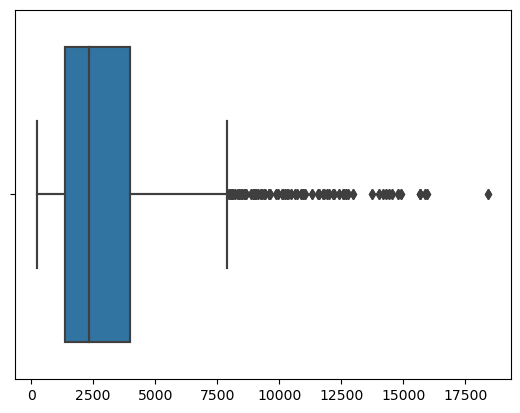

In [60]:
sns.boxplot(x=df.camt.values)
plt.show()

**IQR Score**

In [61]:
Q1 = df["camt"].quantile(0.25);print(Q1)

1365.5


In [62]:
Q2 = df["camt"].quantile(0.5);print(Q2)

2319.5


In [63]:
Q3 = df["camt"].quantile(0.75);print(Q3)

3972.25


In [65]:
IQR = Q3-Q1; print(IQR)

2606.75


In [68]:
(df.camt.values<(Q1-(1.5*IQR))).sum()

0

In [69]:
(df.camt.values>(Q3+(1.5*IQR))).sum()

72

In [77]:
Q3+(1.5*IQR)

7882.375

In [70]:
selection = (df.camt.values<(Q1-(1.5*IQR)))|(df.camt.values>(Q3+(1.5*IQR)))

In [72]:
df_out_iq=df.iloc[selection,]

In [75]:
df_out_iq["camt"].values

array([ 9055.,  8072., 12579.,  9566., 14421.,  8133.,  9436., 12612.,
       15945., 11938.,  8487., 10144.,  8613.,  9572., 10623., 10961.,
       14555.,  8978., 12169., 11998., 10722.,  9398.,  9960., 10127.,
       11590., 13756., 14782., 14318., 12976., 11760.,  8648.,  8471.,
       11328., 11054.,  8318.,  9034.,  8588.,  7966.,  8858., 12389.,
       12204.,  9157., 15653.,  7980.,  8086., 10222., 10366.,  9857.,
       14027., 11560., 14179., 12680.,  8065.,  9271.,  9283.,  9629.,
       15857.,  8335., 11816., 10875.,  9277., 15672.,  8947., 10477.,
       18424., 14896., 12749., 10297.,  8358., 10974.,  8386.,  8229.])

In [76]:
df_out_iq.head()

duration  chist  reason     camt  telephne  lenemp  instrate  perstat  \
5       36.0    3.0     7.0   9055.0       0.0     2.0       2.0      3.0   
17      30.0    1.0    10.0   8072.0       1.0     1.0       2.0      3.0   
18      24.0    3.0     2.0  12579.0       0.0     4.0       4.0      2.0   
57      36.0    5.0     4.0   9566.0       1.0     2.0       2.0      2.0   
63      48.0    1.0    10.0  14421.0       0.0     2.0       2.0      3.0   

    residlen  prpownr   age  housng  numcred  emptype  numliab  customer  
5        4.0      4.0  35.0     3.0      1.0      2.0      2.0       1.0  
17       3.0      3.0  25.0     2.0      3.0      3.0      1.0       1.0  
18       2.0      4.0  44.0     3.0      1.0      4.0      1.0       2.0  
57       2.0      3.0  31.0     2.0      2.0      3.0      1.0       1.0  
63       2.0      3.0  25.0     2.0      1.0      3.0      1.0       2.0

**Z Score**

In [78]:
from scipy import stats
import numpy as np

In [85]:
zscore=np.abs(stats.zscore(df.camt.values))

In [95]:
K=3 #criterio estándar

In [96]:
np.where(zscore>=K)[0]

array([ 18,  63,  87,  95, 105, 236, 272, 274, 373, 374, 378, 381, 395,
       563, 615, 637, 714, 744, 763, 818, 832, 887, 915, 917, 921],
      dtype=int64)

In [97]:
df_out_zscore = df.iloc[np.where(zscore>=K)[0],]

In [98]:
df_out_zscore.head()

duration  chist  reason     camt  telephne  lenemp  instrate  perstat  \
18       24.0    3.0     2.0  12579.0       0.0     4.0       4.0      2.0   
63       48.0    1.0    10.0  14421.0       0.0     2.0       2.0      3.0   
87       36.0    3.0     7.0  12612.0       0.0     2.0       1.0      3.0   
95       54.0    1.0    10.0  15945.0       0.0     1.0       3.0      3.0   
105      24.0    5.0    33.0  11938.0       0.0     2.0       2.0      3.0   

     residlen  prpownr   age  housng  numcred  emptype  numliab  customer  
18        2.0      4.0  44.0     3.0      1.0      4.0      1.0       2.0  
63        2.0      3.0  25.0     2.0      1.0      3.0      1.0       2.0  
87        4.0      4.0  47.0     3.0      1.0      3.0      2.0       2.0  
95        4.0      4.0  58.0     1.0      1.0      3.0      1.0       2.0  
105       3.0      3.0  39.0     2.0      2.0      4.0      2.0       2.0

**Transformación**

**transformación SoftMax**

In [99]:
import statistics as sts

In [106]:
camt_softmax=1/(1+(np.exp(-((df.camt.values-df.iloc[:,3].mean())/sts.stdev(df.iloc[:,3])))))

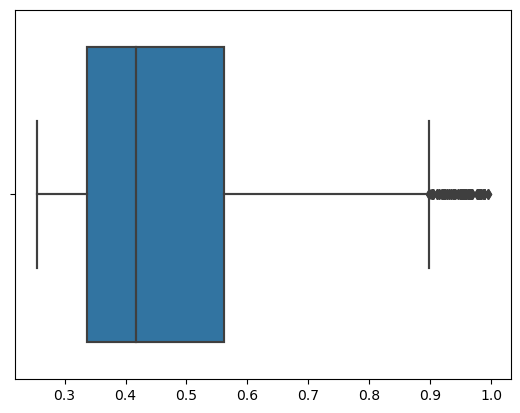

In [108]:
sns.boxplot(x=camt_softmax)
plt.show()

In [109]:
df["camt_soft_max"]=camt_softmax

In [110]:
Q1 = df["camt_soft_max"].quantile(0.25);print(Q1)
Q3 = df["camt_soft_max"].quantile(0.75);print(Q3)
IQR = Q3-Q1; print(IQR)

0.3373456477743716
0.5617673110847272
0.22442166331035562


In [111]:
selection = (df.camt_soft_max.values<(Q1-(1.5*IQR)))|(df.camt_soft_max.values>(Q3+(1.5*IQR)))

In [113]:
len(df.iloc[selection,])

46

**transformación logaritmica**

In [114]:
camt_log = np.log(df.camt.values)

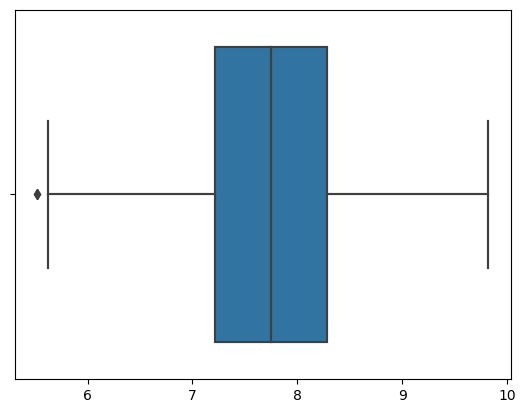

In [116]:
sns.boxplot(x=camt_log)
plt.show()

In [118]:
df["camt_log"]=camt_log

In [119]:
Q1 = df["camt_log"].quantile(0.25);print(Q1)
Q3 = df["camt_log"].quantile(0.75);print(Q3)
IQR = Q3-Q1; print(IQR)

7.219275739698904
8.287087957827445
1.0678122181285419


In [120]:
selection = (df.camt_log.values<(Q1-(1.5*IQR)))|(df.camt_log.values>(Q3+(1.5*IQR)))

In [121]:
len(df.iloc[selection,])

1